In [9]:
#1a - read the churn-bigml-80.csv datafile and create a data-frame called telecom_train.

import pandas as pd
import numpy as np

telecom_train = pd.read_csv('churn-bigml-80 (1).csv')
telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
#1b - create variable in called Churn_numb that takes the value of 1 when Churn = True and 0 when Churn = False.

telecom_train['Churn_numb'] = telecom_train['Churn'].map({False: 0, True: 1})
telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,Churn_numb
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0


In [11]:
#1c - create two variables: int_plan that = 1 when International_plan = Yes and 0 when International_plan = No. 
#voice_plan that takes the value of 1 when Voice_mail_plan = Yes and 0 when Voice_mail_plan = No.

telecom_train['int_plan'] = np.where(telecom_train['International_plan'] == 'No', 0, 1)
telecom_train['voice_plan'] = np.where(telecom_train['Voice_mail_plan'] == 'No', 0, 1)
telecom_train.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,Churn_numb,int_plan,voice_plan
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.70,1,False,0,0,1
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.70,1,False,0,0,1
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,104,7.32,12.2,5,3.29,0,False,0,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,89,8.86,6.6,7,1.78,2,False,0,1,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,121,8.41,10.1,3,2.73,3,False,0,1,0


In [12]:
#1d - RandomForestClassifier model in which Churn_numb is the target variable. Account_length, int_plan,
#Total_intl_minutes, voice_plan, Number_vmail_messages, Total_day_minutes, and Customer_service_calls are inputs. 

from sklearn.ensemble import RandomForestClassifier

X = telecom_train[['Account_length', 'int_plan', 'Total_intl_minutes', 'voice_plan', 'Number_vmail_messages',
                  'Total_day_minutes', 'Customer_service_calls']]
Y = telecom_train['Churn_numb']

RF_md = RandomForestClassifier(n_estimators = 500,
                                max_depth = 4).fit(X, Y)

In [13]:
#1e - GradientBoostingClassifier model where Churn_numb is the target variable. Account_length, int_plan,
#Total_intl_minutes, voice_plan, Number_vmail_messages, Total_day_minutes, and Customer_service_calls inputs. 

from sklearn.ensemble import GradientBoostingClassifier

X1 = telecom_train[['Account_length', 'int_plan', 'Total_intl_minutes', 'voice_plan', 'Number_vmail_messages',
                  'Total_day_minutes', 'Customer_service_calls']]
Y1 = telecom_train['Churn_numb']

GB_md = GradientBoostingClassifier(n_estimators = 500,
                                   max_depth = 4).fit(X1, Y1)

In [14]:
#1f - read the churn-bigml-20.csv datafile and create a data-frame called telecom_test.

telecom_test = pd.read_csv('churn-bigml-20 (1).csv')
telecom_test.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,Total_eve_calls,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [15]:
#1g - create a variable in telecom_test called Churn_numb that takes the value of 1 when Churn = True and 0 
#when Churn = False.

telecom_test['Churn_numb'] = telecom_test['Churn'].map({False: 0, True: 1})
telecom_test.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_eve_charge,Total_night_minutes,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,Churn_numb
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False,0
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,19.42,208.8,111,9.40,12.7,6,3.43,4,True,1
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,27.01,160.6,128,7.23,5.4,9,1.46,4,True,1
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,11.67,189.6,105,8.53,7.7,6,2.08,2,False,0
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,18.28,178.7,90,8.04,11.1,1,3.00,1,False,0


In [16]:
#1h - create two variables in telecom_test: one called int_plan that takes the value of 1 when International_plan 
#is Yes and 0 when International_plan = No, and another one called voice_plan that takes the value of
#1 when Voice_mail_plan = Yes and 0 when Voice_mail_plan = No.

telecom_test['int_plan'] = np.where(telecom_test['International_plan'] == 'No', 0, 1)
telecom_test['voice_plan'] = np.where(telecom_test['Voice_mail_plan'] == 'No', 0, 1)
telecom_test.head()

,State,Account_length,Area_code,International_plan,Voice_mail_plan,Number_vmail_messages,Total_day_minutes,Total_day_calls,Total_day_charge,Total_eve_minutes,...,Total_night_calls,Total_night_charge,Total_intl_minutes,Total_intl_calls,Total_intl_charge,Customer_service_calls,Churn,Churn_numb,int_plan,voice_plan
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,...,90,9.71,8.7,4,2.35,1,False,0,0,0
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,...,111,9.40,12.7,6,3.43,4,True,1,0,0
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,...,128,7.23,5.4,9,1.46,4,True,1,0,0
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,...,105,8.53,7.7,6,2.08,2,False,0,0,0
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,...,90,8.04,11.1,1,3.00,1,False,0,0,0


In [ ]:
#1i - Using models from d and e, predict the likelihood of churn in telecom_test. Using a cutoff value of 0.3, 
#flag customers who are likely to churn. Customers with likelihood of churn greater than or equal than 0.3, will
#get a churn value of 1. Customers with likelihood of churn less than 0.3, will get a churn value of 0.

from sklearn.metrics import accuracy_score, recall_score

rf_pred = RF_md.predict(telecom_test['Churn_numb'])

#Likelihood to labels
logit_label = np.where(rf_pred < .30, 0, 1)

print(f"RF accuracy: {accuracy_score(rf_pred, logit_label)}")
print(f"RF recall: {recall_score(rf_pred, logit_label)}")

### Problem 2 ###

In [29]:
#2a - read the csv file and create a data-frame called insurance

insurance = pd.read_csv('insurance(1).csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
#2b - male = 1 and female = 0. yes smoker = 1 and no = 0

insurance['sex_0_1'] = np.where(insurance['sex'] == 'female', 0, 1)
insurance['smoker_0_1'] = np.where(insurance['smoker'] == 'no', 0, 1)
insurance.head()

,age,sex,bmi,children,smoker,region,charges,sex_0_1,smoker_0_1
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [33]:
#2c - Using the age, bmi, sex 0 1, and smoker 0 1 as input variables, and charges
#as the target variables, split the data into train (80%) and test (20%).

from sklearn.model_selection import train_test_split

X2 = insurance[['age', 'bmi', 'sex_0_1', 'smoker_0_1']]
Y2 = insurance['charges']

X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size = .2)

In [39]:
#2d - Using the train dataset, build a RandomForestRegressor model with n_estimators = 500 and max depth = 3. 
#Use the model to predict the insurance charges in the test dataset. Compute the RMSE and MAE of the model.

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

RF_1 = RandomForestRegressor(n_estimators = 500,
                             max_depth = 3).fit(X2, Y2)

predict_rf1 = RF_1.predict(X_test)

print(f"The MSE is {mean_squared_error(Y_test, predict_rf1, squared = False)}")
print(f"The MAE is {mean_absolute_error(Y_test, predict_rf1)}")

The MSE is 4508.155047832317
The MAE is 2692.8152549644037


In [40]:
#2e - Using the train dataset, build a RandomForestRegressor model with n_estimators = 500 and max depth = 5. 
#Use the model to predict the insurance charges in the test dataset. Compute the RMSE and MAE of the model.

RF_2 = RandomForestRegressor(n_estimators = 500,
                             max_depth = 5).fit(X2, Y2)

predict_rf2 = RF_2.predict(X_test)

print(f"The MSE is {mean_squared_error(Y_test, predict_rf2, squared = False)}")
print(f"The MAE is {mean_absolute_error(Y_test, predict_rf2)}")

The MSE is 4174.344004764636
The MAE is 2431.039862619213


In [41]:
#2f - Using the train dataset, build a GradientBoostingRegressor model with n_estimators = 500 and max depth = 3. 
#Use the model to predict the insurance charges in the test dataset. Compute the RMSE and MAE of the model.

from sklearn.ensemble import GradientBoostingRegressor

GB_1 = GradientBoostingRegressor(n_estimators = 500,
                             max_depth = 3).fit(X2, Y2)

predict_gb1 = GB_1.predict(X_test)

print(f"The MSE is {mean_squared_error(Y_test, predict_gb1, squared = False)}")
print(f"The MAE is {mean_absolute_error(Y_test, predict_gb1)}")

The MSE is 3133.553509095359
The MAE is 1802.5369891972314


In [42]:
#2g - Using the train dataset, build a GradientBoostingRegressor model with n_estimators = 500 and max depth = 5. 
#Use the model to predict the insurance charges in the test dataset. Compute the RMSE and MAE of the model.

from sklearn.ensemble import GradientBoostingRegressor

GB_2 = GradientBoostingRegressor(n_estimators = 500,
                             max_depth = 5).fit(X2, Y2)

predict_gb2 = GB_2.predict(X_test)

print(f"The MSE is {mean_squared_error(Y_test, predict_gb2, squared = False)}")
print(f"The MAE is {mean_absolute_error(Y_test, predict_gb2)}")

The MSE is 1213.8525407186846
The MAE is 610.1200654743488


In [43]:
#2h - Using the results from part (d) to (g), what model would you select to make predictions of insurance charges?

#The model from 2g, the MSE AND MAE are much lower

### Problem 3 ###

In [66]:
#3a -  Using the pandas library, read the csv file and create a data-frame called customers.

customers = pd.read_csv('income_age_days_annual.csv')
customers.head()

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


Text(0, 0.5, 'annual spend')

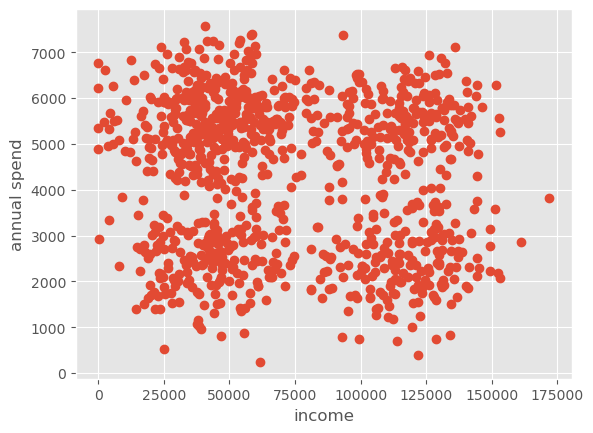

In [67]:
#3b - Do customers with higher income spend more on your business? Create the
#scatter-plot of income and annual_spend. Comment on the plot

import matplotlib.pyplot as plt; plt.style.use('ggplot')

plt.plot('income', 'annual_spend', 'o', data = customers)
plt.xlabel('income')
plt.ylabel('annual spend')

There is no positive correlation from this graph

In [69]:
#3c - Compute the 0-1 transformation (Min-Max transformation) of all the variables and store in the data-frame 
#customers. Called these variables income_0_1, age_0_1, days_since_purchase_0_1 and annual_spend_0_1.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_transform = ['income', 'age', 'days_since_purchase', 'annual_spend']
customers[columns_to_transform] = scaler.fit_transform(customers[columns_to_transform])

customers.rename(columns = {'income': 'income_0_1',
                          'age': 'age_0_1',
                          'days_since_purchase': 'days_since_purchase_0_1',
                          'annual_spend': 'annual_spend_0_1'}, inplace=True)
customers.head()

,income_0_1,age_0_1,days_since_purchase_0_1,annual_spend_0_1
0,0.217832,0.625000,0.733333,0.572793
1,0.295315,0.666667,0.858586,0.545231
2,0.413220,0.479167,0.373737,0.762860
3,0.303830,0.708333,0.238384,0.711284
4,0.653404,0.187500,0.278788,0.205485


In [70]:
#3d - Cluster the data into 3 clusters (using the 0-1 transformed variables from the customers data-frame and 
#append the cluster membership to the customers dataframe). Make sure you use n_init = 20 in the KMeans function.

from sklearn.cluster import KMeans

three_clusters = KMeans(n_clusters = 3, n_init = 20).fit(customers[['income_0_1', 'age_0_1', 'days_since_purchase_0_1', 'annual_spend_0_1']])

customers['cluster'] = three_clusters.labels_
customers.head()

,income_0_1,age_0_1,days_since_purchase_0_1,annual_spend_0_1,cluster
0,0.217832,0.625000,0.733333,0.572793,0
1,0.295315,0.666667,0.858586,0.545231,0
2,0.413220,0.479167,0.373737,0.762860,0
3,0.303830,0.708333,0.238384,0.711284,0
4,0.653404,0.187500,0.278788,0.205485,1


In [81]:
#3e - Describe each of the cluster. Is there any obvious difference between the clusters? Be specific.

cluster_0 = customers[customers['cluster'] == 0].reset_index(drop = True)

cluster_1 = customers[customers['cluster'] == 1].reset_index(drop = True)

cluster_2 = customers[customers['cluster'] == 2].reset_index(drop = True)

In [85]:
cluster_0.apply(np.mean, axis = 0)

income_0_1                 0.397300
age_0_1                    0.652592
days_since_purchase_0_1    0.591051
annual_spend_0_1           0.726069
cluster                    0.000000
dtype: float64

In [86]:
cluster_1.apply(np.mean, axis = 0)

income_0_1                 0.676480
age_0_1                    0.235239
days_since_purchase_0_1    0.309345
annual_spend_0_1           0.308191
cluster                    1.000000
dtype: float64

In [87]:
cluster_2.apply(np.mean, axis = 0)

income_0_1                 0.247054
age_0_1                    0.252874
days_since_purchase_0_1    0.727820
annual_spend_0_1           0.310904
cluster                    2.000000
dtype: float64

From the above, we conclude the following:

Cluster 1 has the highest average income
Cluster 0 has the highest average age
Cluster 2 has the highest average days since last purchase
Cluster 0 has the highest average annual spend